# Confirmed cases and country trajectory charts for Poland
> Day by day statistics of new confirmed cases and comparison with other countries.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2

In [2]:
#hide
import pandas as pd
import altair as alt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
%matplotlib inline
sns.set()

from scripts.data import get_covid_data, get_growth_rate_data

from scripts.plots import plot_confirmed_cases_barplot, plot_new_cases_barplot, make_since_chart

In [3]:
#hide
url = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/'
       'csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df = pd.read_csv(url)
# rename countries
df['Country/Region'] = df['Country/Region'].replace({'Korea, South': 'South Korea'})
df = df[~df['Country/Region'].isin(['Cruise Ship'])]   # Remove Ships
dt_cols = df.columns[~df.columns.isin(['Province/State', 'Country/Region', 'Lat', 'Long'])]

## Number of total cases in Poland

Number of cases grows exponentially.

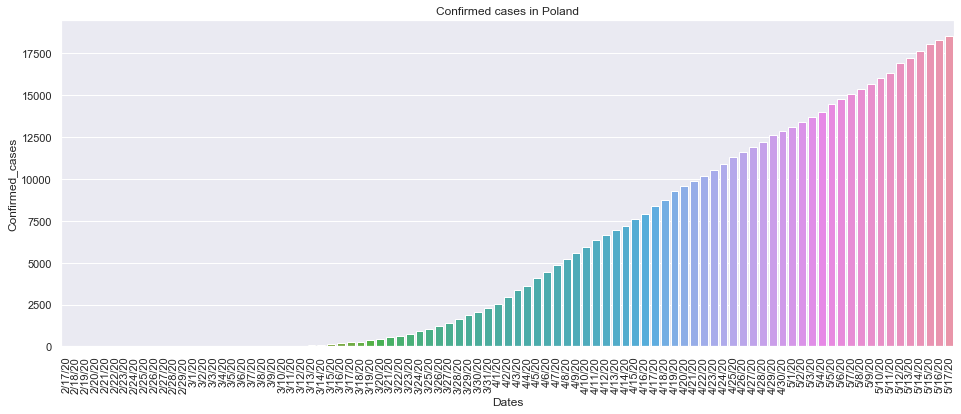

In [4]:
#hide_input
plot_confirmed_cases_barplot(df,'Poland', cutoff=30)

Logarithmic scale shows how fast the number of new cases each day is increasing.

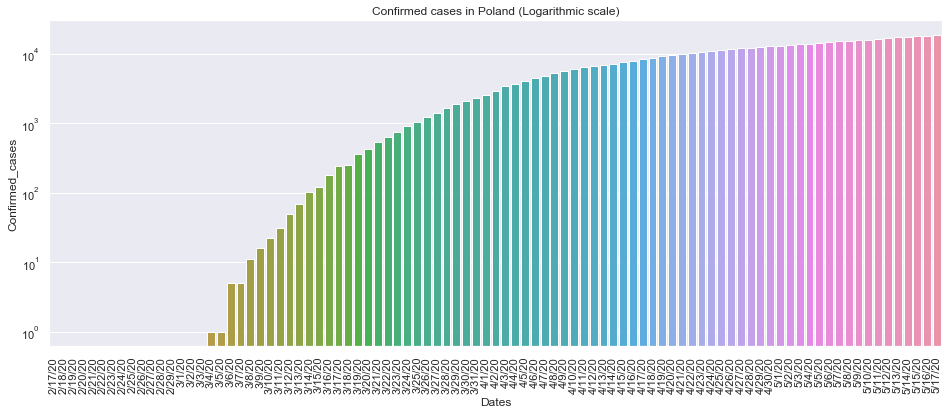

In [5]:
#hide_input
plot_confirmed_cases_barplot(df, 'Poland', cutoff=30, logarithmic_scale=True)

## New daily cases

In [6]:
# #hide
# def plot_new_cases_barplot(country, cutoff=30):
#     data_f = df[df['Country/Region'] == country]
#     nb_cases = data_f.values[0][cutoff:].astype(float)
#     dates = data_f.columns[cutoff:]
#     df_ = pd.DataFrame({'Dates': dates,
#                      'Confirmed_cases': nb_cases})
#     df_['MA'] = df_.iloc[:,1].rolling(window=7).mean()

#     y_pos = np.arange(len(dates))
#     plt.figure(figsize=(12, 4))
#     df_['Confirmed_cases'].diff()
#     plt.bar(range(len(df_['Confirmed_cases'].diff())), df_['Confirmed_cases'].diff())
#     plt.plot(range(len(df_['MA'].diff())), df_['MA'].diff(), '--')
#     plt.xticks(y_pos,dates, rotation=90)
#     plt.title('New daily cases in '+country)

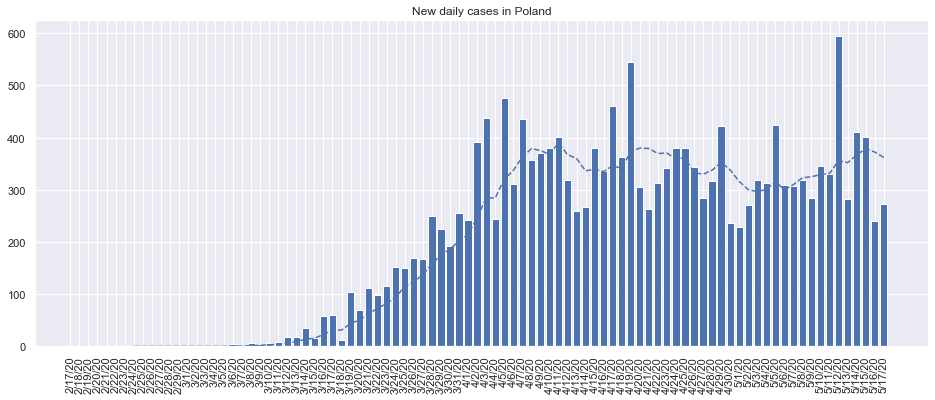

In [7]:
#hide_input
plot_new_cases_barplot(df, 'Poland')

## Country trajectories for total cases

Compare how the growth rate is different from other countries and their trajectories. By days since 100th confirmed case.

> Tip: Click (Shift+ for multiple) on countries in the legend to filter the visualization. 

In [8]:
#hide
countries_to_show = ['Lithuania', 'Poland', 'Russia', 'United States' , 'Belgium', 'United Kingdom', 'China', 'Italy', 'Germany', 'Ukraine', 'Czechia', 'Estonia', 'US', 'France', 'Japan', 'South Korea', 'Latvia', 'Spain']
baseline_countries = ['Italy']
dff2 = get_growth_rate_data(df, countries_to_show)

In [9]:
#hide_input
chart3 = make_since_chart(dff2, ['Poland', 'Japan', 'South Korea'], baseline_countries)
chart3


alt.LayerChart(...)

In [10]:
#hide_input
chart2 = make_since_chart(dff2,['Poland', 'Germany', 'Czechia'], baseline_countries)
chart2

alt.LayerChart(...)

In [11]:

#hide_input
chart2 = make_since_chart(dff2, ['Ukraine', 'Poland'], baseline_countries)
chart2

alt.LayerChart(...)

In [12]:
#hide_input
chart2 = make_since_chart(dff2, ['Poland', 'Spain', 'US'], baseline_countries)
chart2

alt.LayerChart(...)

In [13]:

#hide_input
chart2 = make_since_chart(dff2, ['France', 'Greece', 'Poland'], baseline_countries)
chart2

alt.LayerChart(...)

## New daily cases in other countries

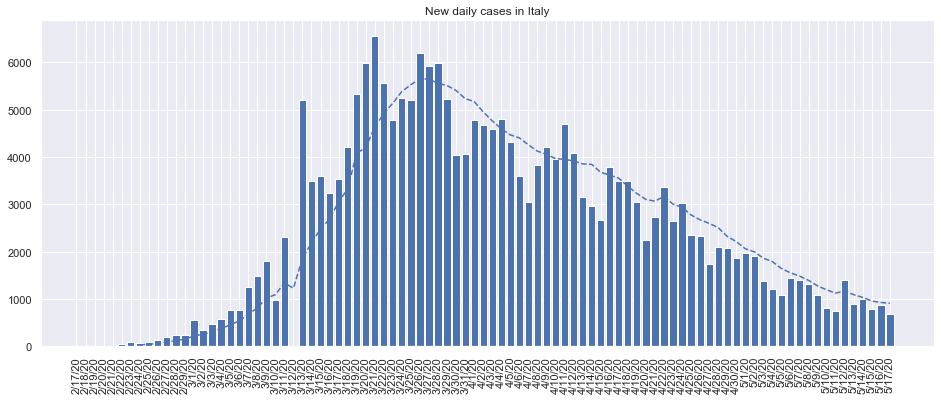

In [14]:
#hide_input
plot_new_cases_barplot(df,'Italy', cutoff=30)

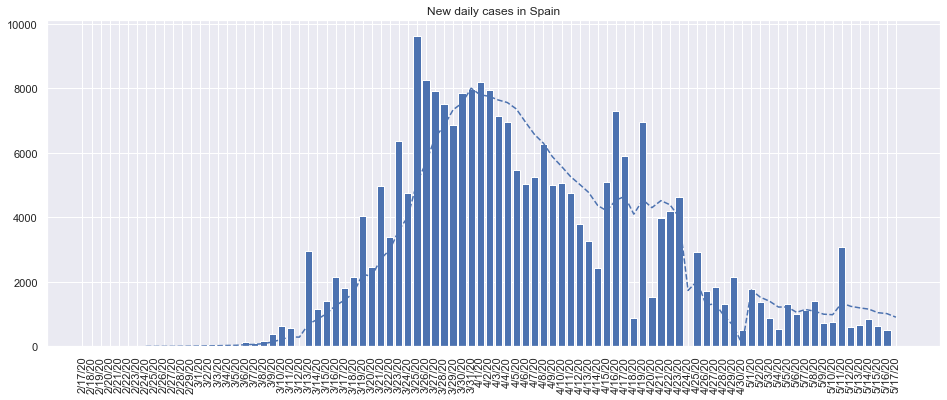

In [15]:
#hide_input
plot_new_cases_barplot(df,'Spain')

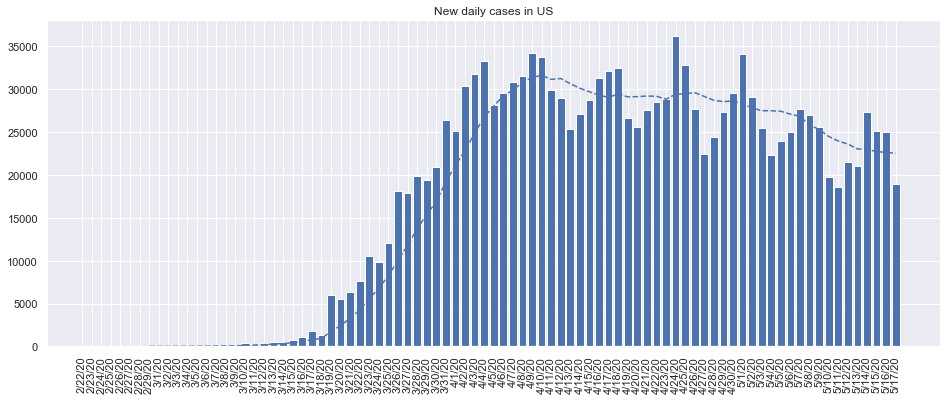

In [16]:
#hide_input
plot_new_cases_barplot(df, 'US', cutoff=35)

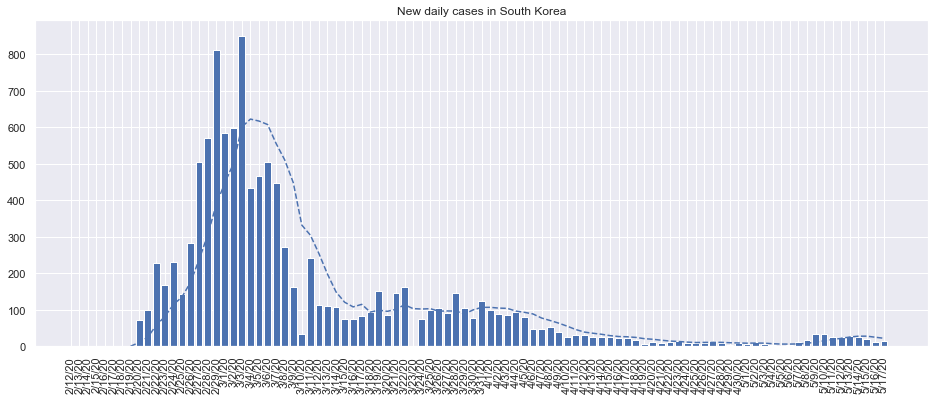

In [17]:
#hide_input
plot_new_cases_barplot(df, 'South Korea', cutoff=25)

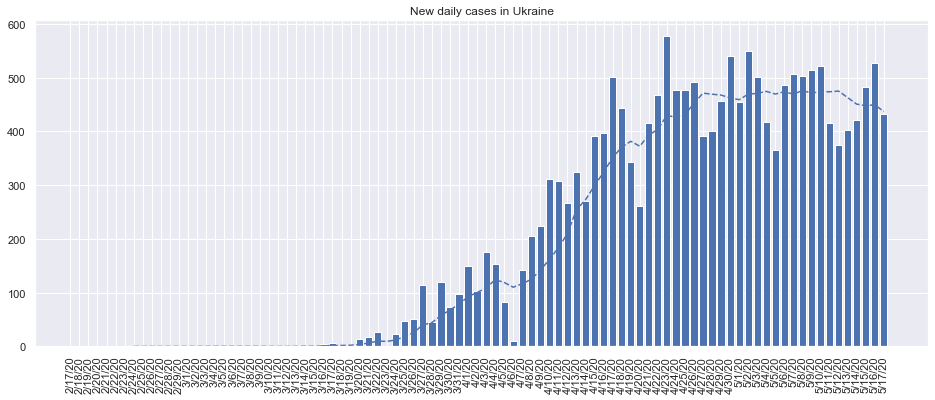

In [18]:
#hide_input
plot_new_cases_barplot(df,'Ukraine', cutoff=30)

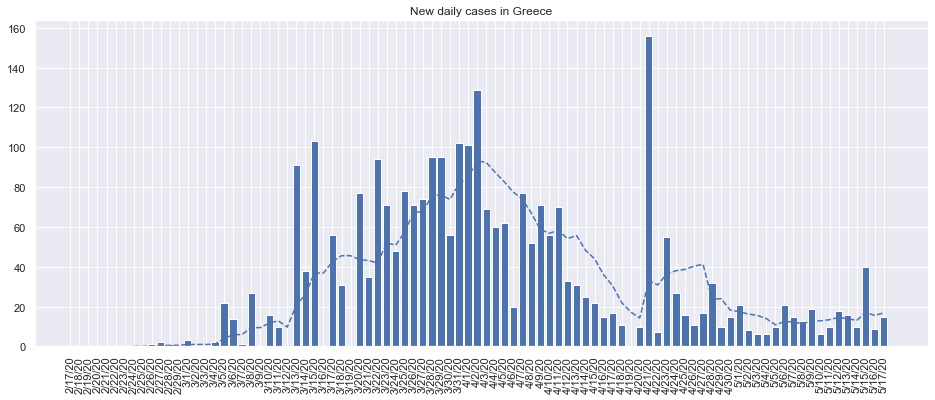

In [19]:
#hide_input
plot_new_cases_barplot(df,'Greece')

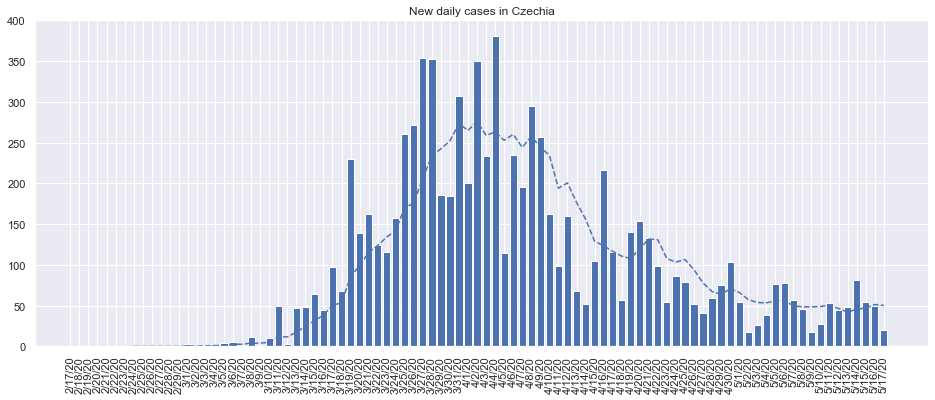

In [20]:
#hide_input
plot_new_cases_barplot(df,'Czechia', cutoff=30)

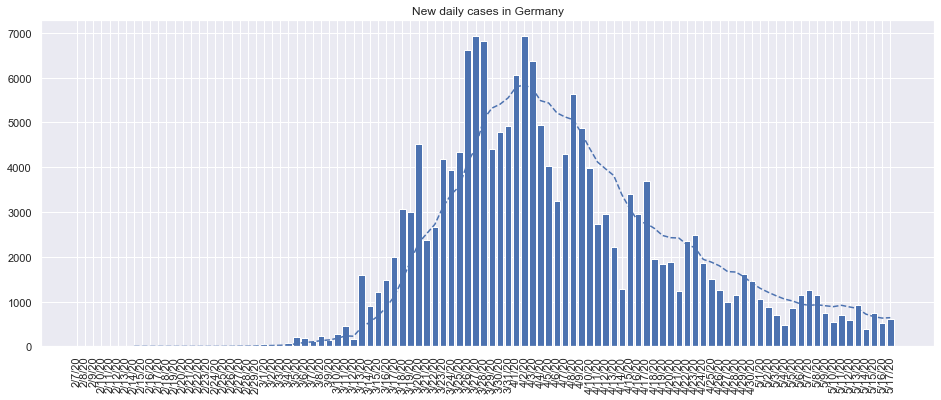

In [21]:
#hide_input
plot_new_cases_barplot(df, 'Germany', cutoff=20)

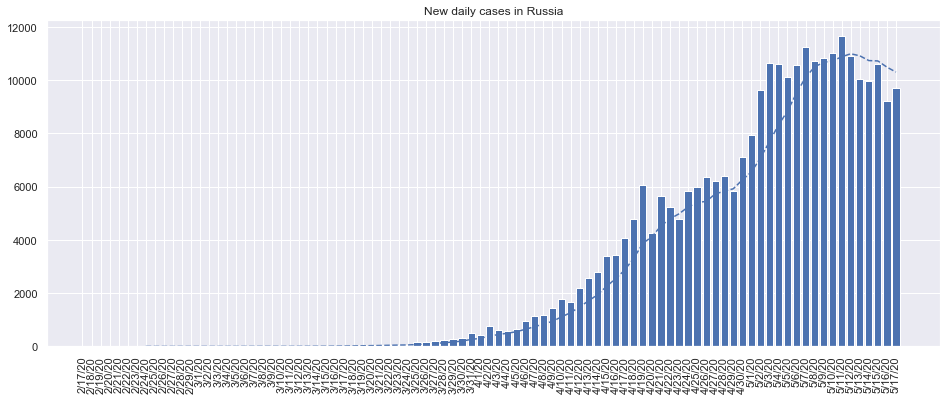

In [22]:
#hide_input
plot_new_cases_barplot(df, 'Russia', cutoff=30)